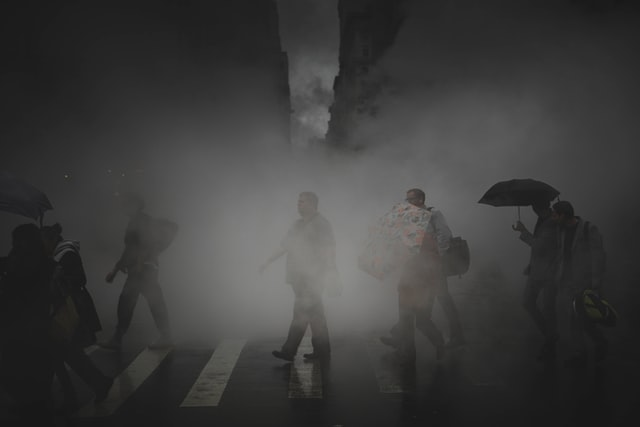

##### Photo by S. on Unsplash

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

In [2]:
df_train = pd.read_csv('../input/tabular-playground-series-mar-2022/train.csv', index_col = 'row_id')
df_test = pd.read_csv('../input/tabular-playground-series-mar-2022/test.csv', index_col = 'row_id')

In [3]:
df_train.time = pd.to_datetime(df_train.time)
df_test.time = pd.to_datetime(df_test.time)

In [4]:
for df in [df_train, df_test]:
    df['weekday'] = df.time.dt.weekday
    df['hour'] = df.time.dt.hour
    df['minute'] = df.time.dt.minute

In [5]:
df_train.head()

,time,x,y,direction,congestion,weekday,hour,minute
row_id,,,,,,,,
0,1991-04-01,0,0,EB,70,0,0,0
1,1991-04-01,0,0,NB,49,0,0,0
2,1991-04-01,0,0,SB,24,0,0,0
3,1991-04-01,0,1,EB,18,0,0,0
4,1991-04-01,0,1,NB,60,0,0,0


In [6]:
X = df_train.drop(columns = ['congestion','time'])
y = df_train['congestion']
X = pd.get_dummies(X)
df_test = df_test.drop(columns = 'time')
df_test = pd.get_dummies(df_test)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
model = xgb.XGBRegressor(n_estimators=999)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [10]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=999, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [11]:
predictions = model.predict(X_test)

In [12]:
mean_absolute_error(y_test, predictions)

6.335267706263264

In [13]:
feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

direction_NW    0.339613
direction_SE    0.190190
direction_SB    0.103364
direction_NB    0.064615
direction_NE    0.060703
direction_SW    0.058332
y               0.051957
x               0.051269
direction_EB    0.040691
direction_WB    0.019260
hour            0.013993
weekday         0.004507
minute          0.001506
dtype: float32

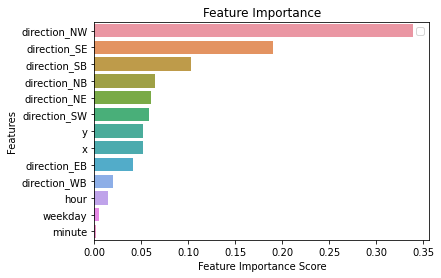

In [14]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.legend()
plt.show()

In [15]:
predictions = model.predict(df_test)

In [16]:
sample = pd.read_csv('../input/tabular-playground-series-mar-2022/sample_submission.csv', index_col = 'row_id')

In [17]:
sample['congestion'] = predictions

In [18]:
sample.to_csv('my_submission.csv')